<a href="https://colab.research.google.com/github/kbharath21/iiith/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=599e914baea601e673b0f11a1dd5c71904796ca06ddd2e7ae97b33b3b25a9a78
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
topic1 = 'India'
topic2 = 'Giraffe'
wikipedia.set_lang('ar')
ar1 = wikipedia.page(topic1).content
ar2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content


In [ ]:
ar1

"الهند (بالهندية: भारत)، رسميًا: جمهورية الهند (بالهندية: भारत गणराज्य)، بلد في جنوب آسيا. تعد الهند أكبر دولة من حيث عدد السكان، وسابع أكبر دولة من حيث المساحة، والديمقراطية الأكثر اكتظاظًا بالسكان في العالم حيث يفوق تعدادها\n1.410 مليار إنسان، يحدها المحيط الهندي من الجنوب، وبحر العرب من الجنوب الغربي، وخليج البنغال من الجنوب الشرقي، وتشترك في الحدود البرية مع باكستان من الغرب؛ والصين ونيبال وبوتان من الشمال؛ وبنغلاديش وميانمار إلى الشرق. تقع الهند بالقرب من سريلانكا وجزر المالديف في المحيط الهندي. تشترك جزر أندمان ونيكوبار في حدود بحرية مع تايلاند وإندونيسيا.\nوصل الإنسان الحديث إلى شبه القارة الهندية من أفريقيا منذ ما يقرب من 55 ألف عام. لقد أدى احتلالهم الطويل في البداية بأشكال مختلفة من العزلة كالصيادين، إلى جعل المنطقة شديدة التنوع، إذ تأتي في المرتبة الثانية بعد أفريقيا في التنوع الجيني البشري. ظهرت الحياة المستقرة في شبه القارة الهندية في الحواف الغربية لحوض نهر السند قبل 9000 عام، وتطورت تدريجيًا إلى حضارة وادي السند في الألفية الثالثة قبل الميلاد. بحلول عام 1200 قبل الميلاد،

In [ ]:
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text
ar1 = cleanup(ar1)
ar2 = cleanup(ar2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(ar2)

الزَّرَافَةُ (الجمع: زَرَافَى وزَرَافِيُّ) هي جنس من الثدييَّات الأفريقيَّة شفعيَّة الأصابع، وهي أطولُ الحيوانات البريَّة بلا مُنازع، وأضخم المُجترَّات على الإطلاق. اسمُها العلميّ «Giraffa camelopardalis» (نقحرة: جيرافا كاميلوپاردالِس)، واسمُ نوعها، أي «camelopardalis»، يعني حرفيَّا «الجمل النمريّ» أو «الجمل الأنمر»، في إشارةٍ إلى شكلها الشبيه بالجمل واللطخات المُلوَّنة على جسدها التي تجعلها شبيةٍ بالنمر. أبرزُ خصائصها المُميَّزة هي عُنقها وقوائمها فارعة الطول، والنُتوءات العظميَّة على رأسها الشبيهة بالقُرون، وأنماطُ فرائها المُتنوِّعة. تُصنَّفُ ضمن فصيلة الزرافيَّات، إلى جانب قريبها الوحيد المُتبقي، أي الأكَّأب. منها تسعُ نويعات، يُمكنُ التفريق بينها عبر أنماط فرائها التي تختلفُ من نويعٍ إلى آخر.
موطنُ الزرافى الحالي مُتجزّءٌ، وجُمهراتها مُبعثرةٌ، وتنتشرُ من التشاد شمالًا حتَّى جنوب أفريقيا جنوبًا، ومن النيجر غربًا إلى الصومال شرقًا. تشملُ موائلها الطبيعيَّة عادةً السڤناء، والأراضي العُشبيَّة، والأحراج المكشوفة. قوتُها الرئيسيّ هو أوارقُ الطلح (السنط، أو الأقاقيا)، التي ترعاها على ارت

In [ ]:
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st
def key2string(keys):
  return [tuple2string(i) for i in keys]
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

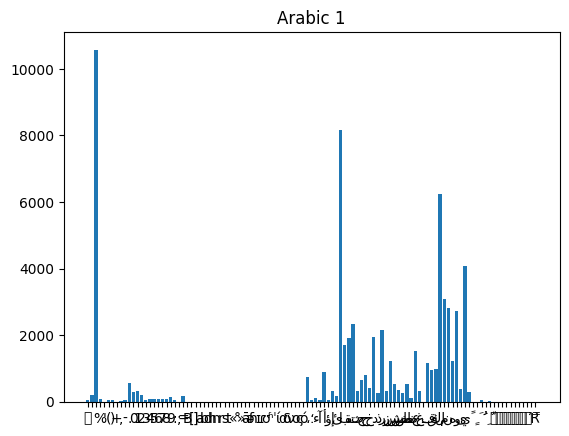

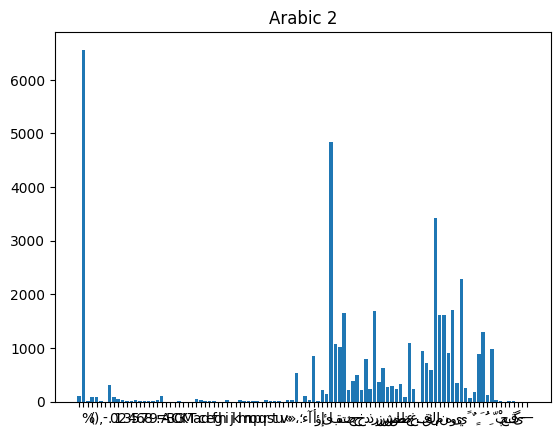

In [ ]:
unigram_ar1 = Counter(ngrams(ar1,1))
plothistogram(unigram_ar1)
plt.title('Arabic 1')
plt.show()
unigram_ar2 = Counter(ngrams(ar2,1))
plothistogram(unigram_ar2)
plt.title('Arabic 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151:

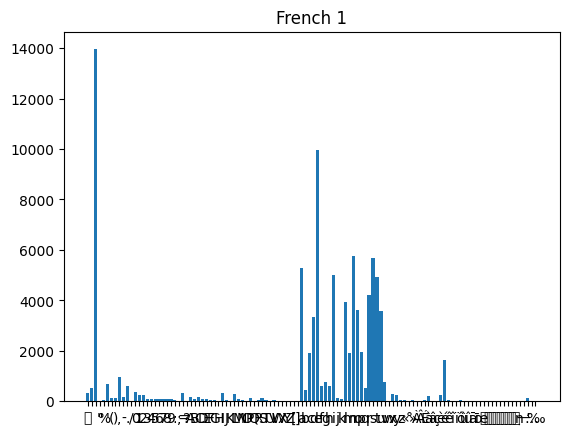

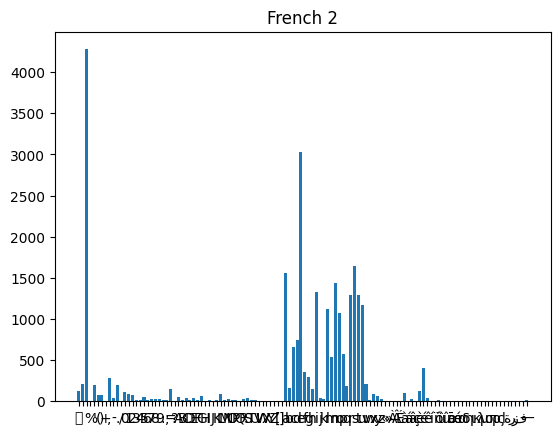

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151

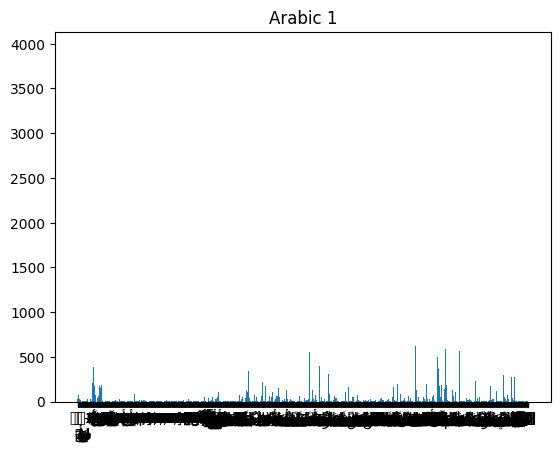

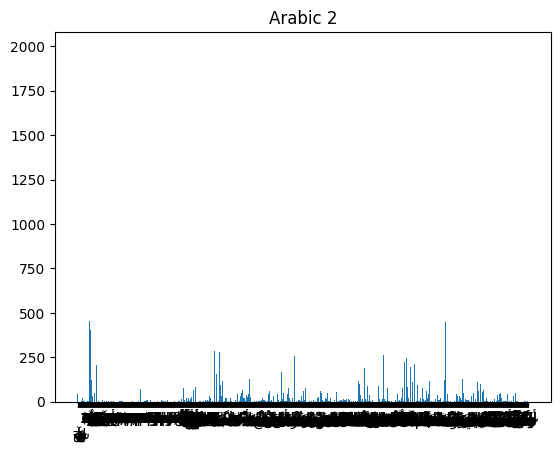

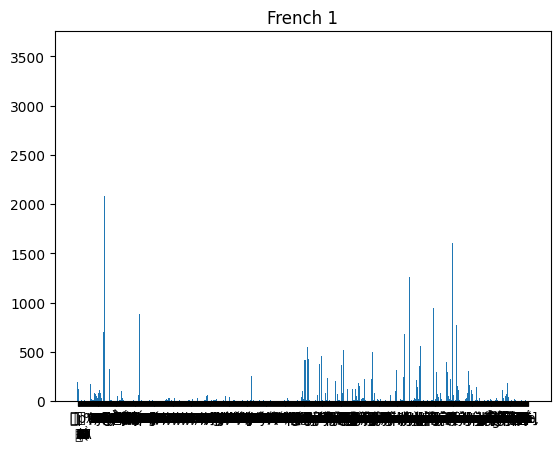

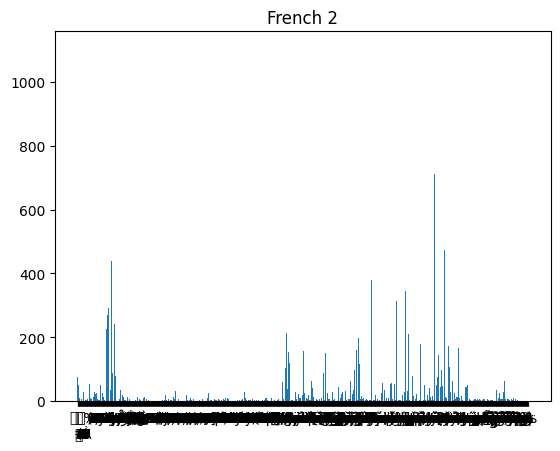

In [ ]:
bigram_ar1 = Counter(ngrams(ar1,2)) # bigrams
plothistogram(bigram_ar1)
plt.title('Arabic 1')
plt.show()

bigram_ar2 = Counter(ngrams(ar2,2))
plothistogram(bigram_ar2)
plt.title('Arabic 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_fr1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

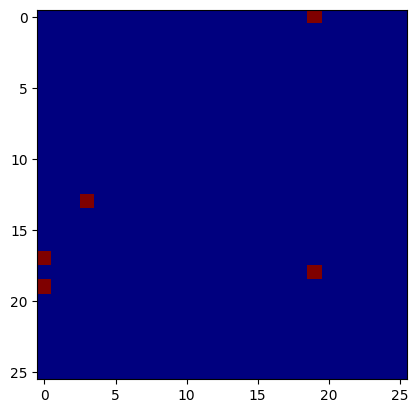

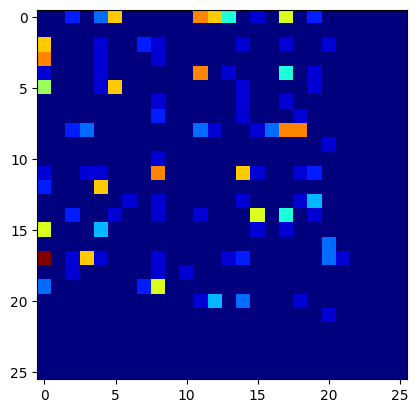

In [ ]:
biar1 = plotbihistogram(bigram_ar1)
plt.show()
biar2 = plotbihistogram(bigram_ar2)

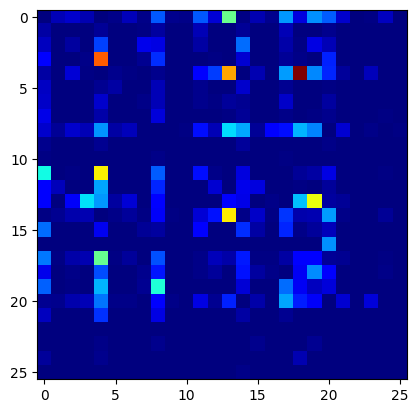

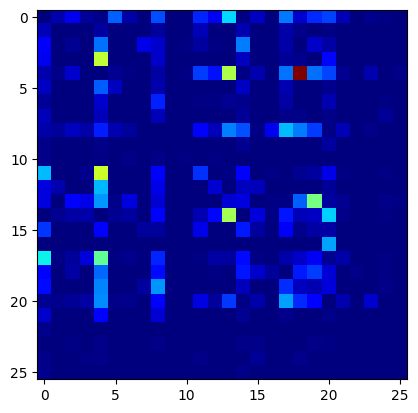

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nArabic 1:')
ShowTopN(biar1)
print('\nArabic 2:')
ShowTopN(biar2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


Arabic 1:
('n', 'd') : 1.0
('s', 't') : 1.0
('a', 't') : 1.0
('r', 'a') : 1.0
('t', 'a') : 1.0
('a', 'a') : 0.0
('r', 'd') : 0.0
('r', 'e') : 0.0
('r', 'f') : 0.0
('r', 'g') : 0.0

Arabic 2:
('r', 'a') : 13.0
('l', 'i') : 10.0
('i', 's') : 10.0
('i', 'r') : 10.0
('a', 'l') : 10.0
('e', 'l') : 10.0
('d', 'a') : 10.0
('l', 'o') : 9.0
('f', 'f') : 9.0
('a', 'f') : 9.0

French 1:
('e', 's') : 1978.0
('d', 'e') : 1602.0
('e', 'n') : 1449.0
('o', 'n') : 1299.0
('l', 'e') : 1291.0
('n', 't') : 1259.0
('a', 'n') : 946.0
('r', 'e') : 942.0
('t', 'i') : 770.0
('l', 'a') : 738.0

French 2:
('e', 's') : 631.0
('l', 'e') : 378.0
('d', 'e') : 368.0
('e', 'n') : 353.0
('o', 'n') : 346.0
('n', 't') : 313.0
('r', 'e') : 294.0
('r', 'a') : 230.0
('a', 'n') : 213.0
('o', 'u') : 209.0


In [ ]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

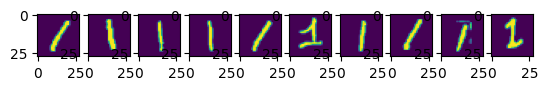

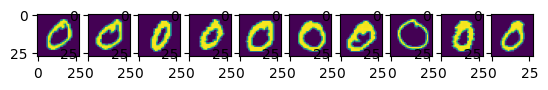

In [ ]:
for ii in range(10):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(10):
  plt.subplot(1, 10, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
sum1 = np.sum(no1>0, (1,2))
sum0 = np.sum(no0>0, (1,2))

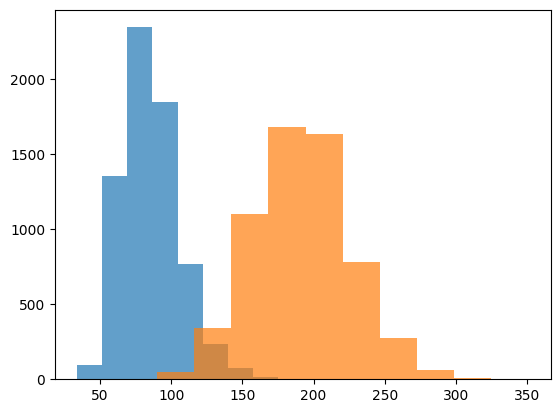

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  hole = hull & ~ (img>0)
  return hole

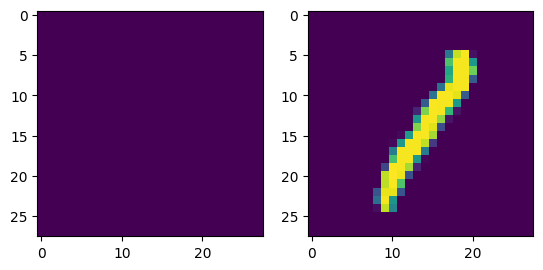

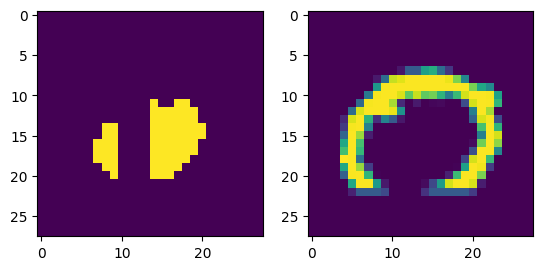

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

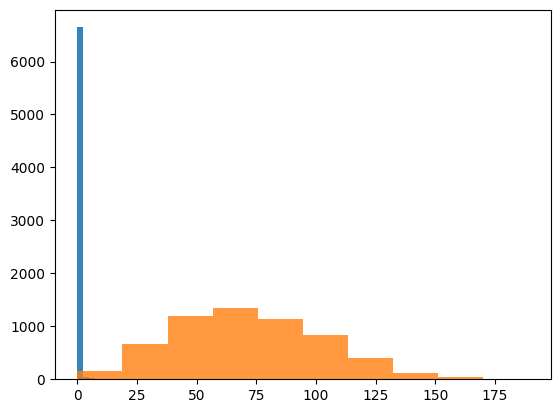

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
plt.hist(hole1, alpha=0.9);
plt.hist(hole0, alpha=0.8);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3)
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4
  return hull

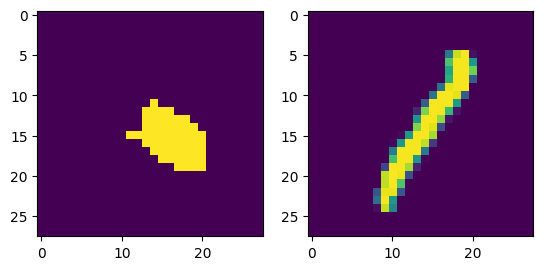

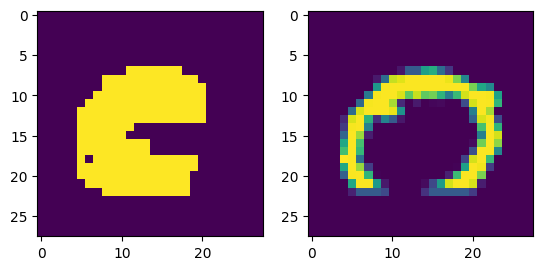

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

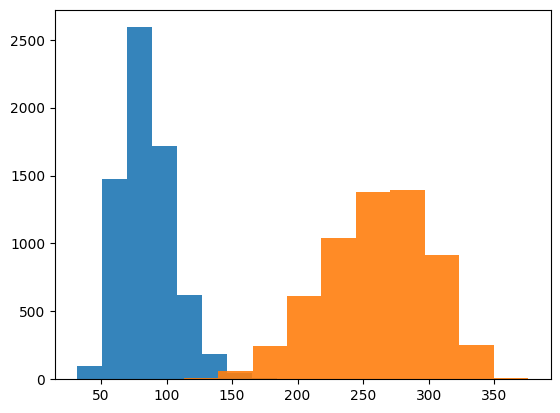

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.9);
plt.hist(hull0, alpha=0.9);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

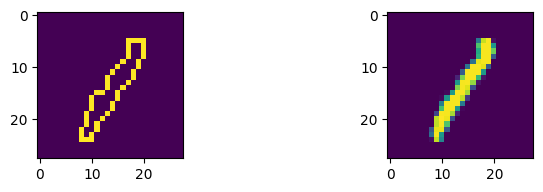

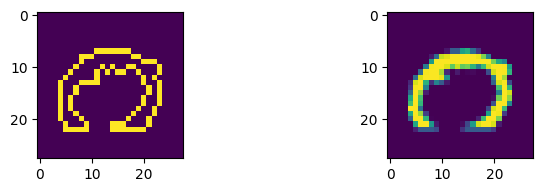

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,3,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,3,3)
  plt.imshow(img)
  plt.show()

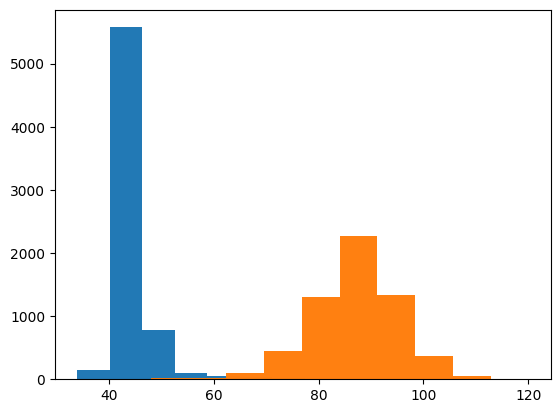

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.99);
plt.hist(bound0, alpha=0.99);

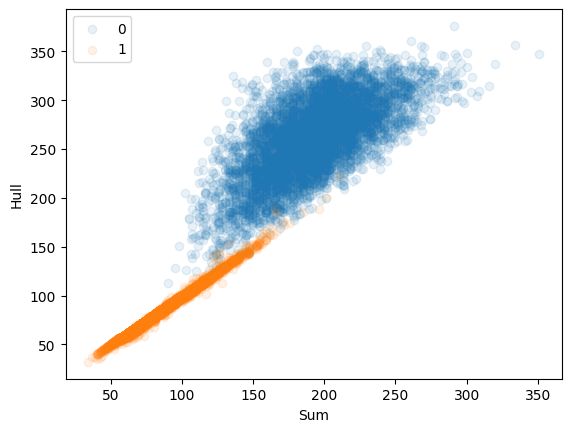

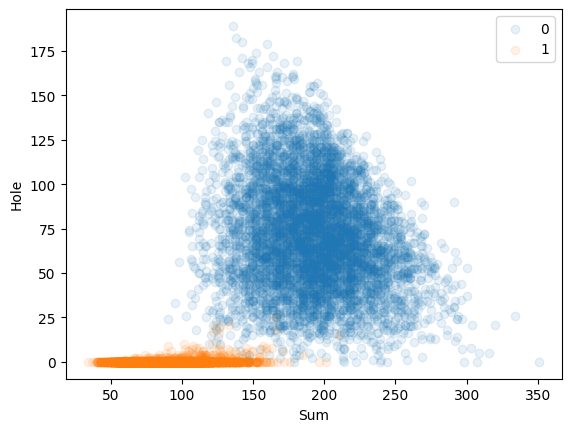

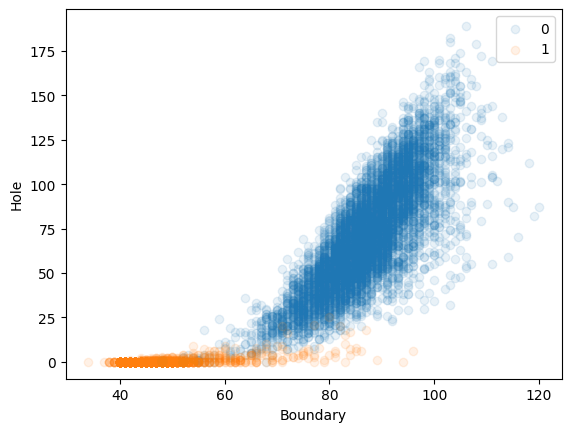

In [ ]:
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Questions and answers:

1.Which is the best combination of features?

ans: depends on the type of data , variable in sizes.
A large data set may enable us to use large number of features.

2.How would you test or visualize four or more features?

ans:Dimension reduction-projects higher dimension of data into lower dimensions.
There are two types dimension reduction methods:PCA, SNE.
other ways to visualize 4 or more features is making use of the heatmaps and 3d 4d scatter plots.

3.Can you come up with your own features?

ans:yes features such as time-based and the statistical summaries (central tendencies) based on the domain knowledge , insights of the problem.

4.Will these features work for different classes other than 0 and 1?
ans:yes , machine learning can handle multiple classes.

5.What will happen if we take more that two classes at a time?
ans:it explands the complexity of the problem.The choice of features and model evaluation may differ depending on the number and nature of the features.